<a href="https://colab.research.google.com/github/VitorGama10/Machine-Learning-/blob/main/Praticas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
renomear = {
    'expected_hours': 'horas_esperadas',
    'price': 'preço',
    'unfinished': 'nao_finalizados'
}
dados = dados.rename(columns = renomear)
dados

,nao_finalizados,horas_esperadas,preço
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [ ]:
troca = {
    0 : 1, # 0 vai pegar o 1 
    1 : 0 # 1 vai pegar o 0
}
dados['finalizados'] = dados.nao_finalizados.map(troca) # Mapear
dados.head() 
# Fez uma nova coluna

,nao_finalizados,horas_esperadas,preço,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
dados.tail() # pega os ultimos elementos

,nao_finalizados,horas_esperadas,preço,finalizados
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


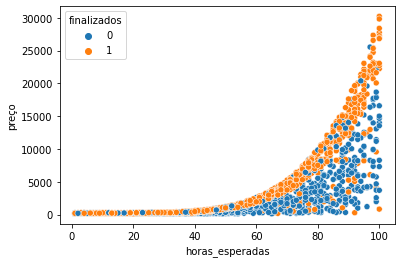

In [ ]:
import seaborn as sns 
sns.scatterplot(x='horas_esperadas', y='preço', hue='finalizados', data=dados) # data: pega os elementos para colocar no grafico
                # O x é em baixo                hue laranja: cor para os finalizados        
                # O y é do lado esquerdo

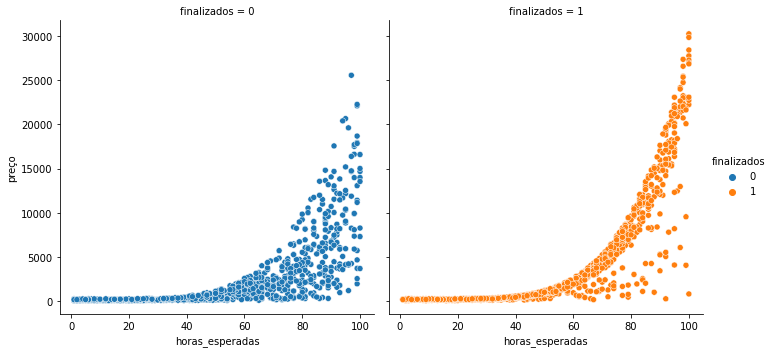

In [ ]:
import seaborn as sns 
sns.relplot(x='horas_esperadas', y='preço', hue='finalizados', col='finalizados', data=dados) ## col separação de coluna.

In [ ]:
x = dados[['horas_esperadas', 'preço']]
y = dados['finalizados']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 2
np.random.seed(SEED) # ja fica fixo

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 65.93%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### Pegou os 1 = np.ones(540) 

In [ ]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print('A acuracia do algoritmo de baseline foi %.2f%%' % acuracia)

A acuracia do algoritmo de baseline foi 52.59%


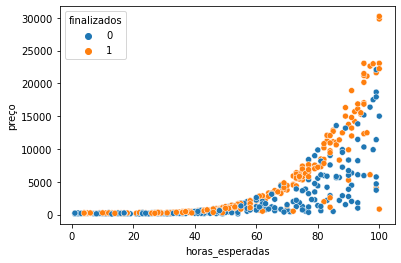

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preço', hue=teste_y, data=teste_x)

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()

In [ ]:
y_min = teste_x.preço.min()
y_max = teste_x.preço.max()

In [ ]:
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [ ]:
pixels = 100             #100 - 1 = 99 e 99 dividido por 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y) # mesclar == combinaçao, misturar e fusão
pontos = np.c_[xx.ravel(), yy.ravel()]  # Concatenar, juntou os numeros

In [ ]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
import matplotlib.pyplot as plt

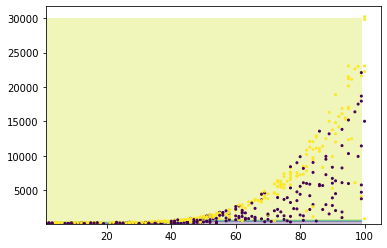

In [ ]:
plt.contourf(xx,yy, z, alpha = 0.3) # alpha é a transparencia da cor do grafico | coutourf é a cor do grafico em volta
plt.scatter(teste_x.horas_esperadas, teste_x.preço, c=teste_y, s=4) #c é cor, s é tamanho

# ScandScaler 

In [ ]:
from sklearn.preprocessing import StandardScaler # Escalar 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # SVC vai ser mais solto 
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED) # numpy ja fica fixo o random_state 

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler() # modelo 
scaler.fit(raw_treino_x) # Treina 
treino_x = scaler.transform(raw_treino_x) # vai transforma meu treino_x e meu teste_x
teste_x = scaler.transform(raw_teste_x)

modelo = SVC() 
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


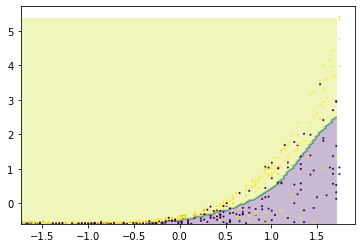

In [ ]:
data_x = teste_x[:,0] # primeira coluna
data_y = teste_x[:,1] # segunda coluna 

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

pixels = 100             #100 - 1 = 99 e 99 dividido por 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y) # mesclar == combinaçao, misturar e fusão
pontos = np.c_[xx.ravel(), yy.ravel()]  # Concatenar, juntou os numeros   

z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

import matplotlib.pyplot as plt
plt.contourf(xx,yy, z, alpha = 0.3) # alpha é a transparencia da cor do grafico | coutourf é a cor do grafico em volta
plt.scatter(data_x, data_y, c=teste_y, s=1) #c é cor, s é tamanho